**Imports**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge

**Dataset without groups and times**

In [2]:
file_path = "./dataset_without_groups_and_time.xlsx"
grade_interval = 15
data_first_to_five = pd.read_excel(file_path)
data_first_to_six = pd.read_excel(file_path)

#XFive = data_first_to_five.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Sixth_Weekly_Exam','Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
#YFive = data_first_to_five['Final_Exam']

#XSix = data_first_to_six.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
#YSix = data_first_to_six['Final_Exam']

XFive = data_first_to_five.drop(columns=['Final_Exam', 'Id', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Sixth_Weekly_Exam','Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YFive = data_first_to_five['Final_Exam']

XSix = data_first_to_six.drop(columns=['Final_Exam', 'Id' ,'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YSix = data_first_to_six['Final_Exam']

print(XFive)
print(XSix)

print(YFive)
print(YSix)

XFive_train, XFive_test, YFive_train, YFive_test = train_test_split(XFive, YFive, test_size=0.2, random_state=42)
XSix_train, XSix_test, YSix_train, YSix_test = train_test_split(XSix, YSix, test_size=0.2, random_state=42)

**Dataset with groups and times**

In [10]:
file_path = "./dataset_with_groups_and_time.xlsx"
grade_interval = 15

data_first_to_five = pd.read_excel(file_path)
data_first_to_six = pd.read_excel(file_path)

#XFive = data_first_to_five.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Sixth_Weekly_Exam','Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
#YFive = data_first_to_five['Final_Exam']

#XSix = data_first_to_six.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
#YSix = data_first_to_six['Final_Exam']

XFive = data_first_to_five.drop(columns=['Final_Exam', 'Id', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Sixth_Weekly_Exam','Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YFive = data_first_to_five['Final_Exam']

XSix = data_first_to_six.drop(columns=['Final_Exam', 'Id' ,'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YSix = data_first_to_six['Final_Exam']

print(XFive)
print(XSix)

print(YFive)
print(YSix)

XFive_train, XFive_test, YFive_train, YFive_test = train_test_split(XFive, YFive, test_size=0.2, random_state=42)
XSix_train, XSix_test, YSix_train, YSix_test = train_test_split(XSix, YSix, test_size=0.2, random_state=42)

**Subject-Based Classifier**

In [5]:
def classify_grade_base(score, max_score=50, interval=15):
    excellent_threshold = max_score * 0.85  # 42.5
    good_threshold = max_score * 0.7        # 35
    medium_threshold = max_score * 0.55     # 27.5
    sufficient_threshold = max_score * 0.4  # 20

    if score > excellent_threshold:
        return "EXCELLENT"
    elif good_threshold < score <= excellent_threshold:
        return "GOOD"
    elif medium_threshold < score <= good_threshold:
        return "MEDIUM"
    elif sufficient_threshold < score <= medium_threshold:
        return "SUFFICIENT"
    else:
        return "FAIL"

#test_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#results = {score: classify_grade_base(score) for score in test_scores}
#print(results)

**Performance-Tiered Classifier**

In [ ]:
def classify_grade(score, max_score=50):
    high_threshold = max_score * 0.6  # Top 60% and above
    medium_threshold = max_score * 0.4  # Middle 30-60%

    if score >= high_threshold:
        return "HIGH"
    elif score >= medium_threshold:
        return "MEDIUM"
    else:
        return "LOW"

#test_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#results = {score: classify_grade(score) for score in test_scores}
#print(results)

**Buffer-Zone Classifier**

In [ ]:
def classify_grade(score, max_score=50, interval=15, buffer=0.06):
    # Define grade thresholds
    excellent_threshold = max_score * 0.85
    good_threshold = max_score * 0.7
    medium_threshold = max_score * 0.55
    sufficient_threshold = max_score * 0.4

    buffer_zone = max_score * buffer

    # Apply grading logic with buffer zones
    if score > excellent_threshold or (excellent_threshold - buffer_zone) <= score:
        return "EXCELLENT"
    elif good_threshold < score <= excellent_threshold or (good_threshold - buffer_zone) <= score < excellent_threshold:
        return "GOOD"
    elif medium_threshold < score <= good_threshold or (medium_threshold - buffer_zone) <= score < good_threshold:
        return "MEDIUM"
    elif sufficient_threshold < score <= medium_threshold or (sufficient_threshold - buffer_zone) <= score < medium_threshold:
        return "SUFFICIENT"
    else:
        return "FAIL"

#test_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#results = {score: classify_grade(score) for score in test_scores}
#print(results)

**Metrics calculation**

In [6]:
def calculate_metrics(y_test, y_pred):
    test_grades = y_test.apply(lambda x: classify_grade_base(x))
    actual_grades = pd.Series(y_pred).apply(lambda x: classify_grade_base(x))
    metrics = {
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Accuracy": accuracy_score(test_grades,actual_grades)
    }
    return metrics

**Plot generation**

In [7]:
def generate_metrics_comparison(rf_five_values, rf_six_values, title):
    metrics = ['MSE', 'RMSE', 'MAE', 'R²']
    x = np.arange(len(metrics))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, rf_five_values, width, label='Model (5 weekly exams)', color='blue')
    bars2 = ax.bar(x + width/2, rf_six_values, width, label='Model (6 weekly exams)', color='orange')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def generate_confusion_matrices(y_pred_five, y_pred_six):
    YFive_test_grades = YFive_test.apply(lambda x: classify_grade_base(x))
    YSix_test_grades = YSix_test.apply(lambda x: classify_grade_base(x))
    y_pred_five_grades = pd.Series(y_pred_five).apply(lambda x: classify_grade_base(x))
    y_pred_six_grades = pd.Series(y_pred_six).apply(lambda x: classify_grade_base(x))

    confusion_five = confusion_matrix(YFive_test_grades, y_pred_five_grades, labels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'])
    confusion_six = confusion_matrix(YSix_test_grades, y_pred_six_grades, labels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'])

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.heatmap(confusion_five, annot=True, fmt='d', cmap='Blues',
                xticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'],
                yticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'], ax=axes[0])
    axes[0].set_title("Model (5 weekly exams)")
    axes[0].set_xlabel("Predicted Grade")
    axes[0].set_ylabel("Actual Grade")

    sns.heatmap(confusion_six, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'],
                yticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'], ax=axes[1])
    axes[1].set_title("Model (6 weekly exams)")
    axes[1].set_xlabel("Predicted Grade")
    axes[1].set_ylabel("Actual Grade")

    plt.tight_layout()
    plt.show()

"""def generate_confusion_matrices(y_pred_five, y_pred_six):
    YFive_test_grades = YFive_test.apply(lambda x: classify_grade(x))
    YSix_test_grades = YSix_test.apply(lambda x: classify_grade(x))
    y_pred_five_grades = pd.Series(y_pred_five).apply(lambda x: classify_grade(x))
    y_pred_six_grades = pd.Series(y_pred_six).apply(lambda x: classify_grade(x))

    confusion_five = confusion_matrix(YFive_test_grades, y_pred_five_grades, labels=['LOW', 'MEDIUM', 'HIGH'])
    confusion_six = confusion_matrix(YSix_test_grades, y_pred_six_grades, labels=['LOW', 'MEDIUM', 'HIGH'])

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.heatmap(confusion_five, annot=True, fmt='d', cmap='Blues',
                xticklabels=['LOW', 'MEDIUM', 'HIGH'],
                yticklabels=['LOW', 'MEDIUM', 'HIGH'], ax=axes[0])
    axes[0].set_title("Model (5 weekly exams)")
    axes[0].set_xlabel("Predicted Grade")
    axes[0].set_ylabel("Actual Grade")

    sns.heatmap(confusion_six, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['LOW', 'MEDIUM', 'HIGH'],
                yticklabels=['LOW', 'MEDIUM', 'HIGH'], ax=axes[1])
    axes[1].set_title("Model (6 weekly exams)")
    axes[1].set_xlabel("Predicted Grade")
    axes[1].set_ylabel("Actual Grade")

    plt.tight_layout()
    plt.show()"""

def generate_predicted_vs_actual_comparison(YFive_test, y_pred_rf_five, YSix_test, y_pred_rf_six, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(YFive_test, y_pred_rf_five, alpha=0.6, color='blue', label='Model (5 weekly exams)')
    plt.scatter(YSix_test, y_pred_rf_six, alpha=0.6, color='orange', label='Model (6 weekly exams)')
    plt.plot([min(YFive_test), max(YFive_test)], [min(YFive_test), max(YFive_test)], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def generate_feature_importance_comparison(rf_five_model, rf_six_model, XFive, XSix, title):
    feature_importances_five = rf_five_model.feature_importances_
    feature_importances_six = rf_six_model.feature_importances_
    features_five = XFive.columns
    features_six = XSix.columns

    all_features = features_six
    importances_five_combined = []
    importances_six_combined = []

    for feature in all_features:
        if feature in features_five:
            importances_five_combined.append(feature_importances_five[features_five.get_loc(feature)])
        else:
            importances_five_combined.append(0)

        importances_six_combined.append(feature_importances_six[features_six.get_loc(feature)])

    x = np.arange(len(all_features))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, importances_five_combined, width, label='Model (5 weekly exams)', color='blue')
    plt.bar(x + width/2, importances_six_combined, width, label='Model (6 weekly exams)', color='orange')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(title)
    plt.xticks(x, all_features, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def generate_accuracy_comparison(accuracy_five, accuracy_six, title):
    models = ['Model (5 weekly exams)', 'Model (6 weekly exams)']
    accuracies = [accuracy_five, accuracy_six]

    plt.figure(figsize=(8, 6))
    plt.bar(models, accuracies, color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(title)

    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f"{acc:.2%}", ha='center', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

**Simple Random Forest**

In [11]:
rf_five_model = RandomForestRegressor(random_state=42)
rf_six_model = RandomForestRegressor(random_state=42)

rf_five_model.fit(XFive_train, YFive_train)
rf_six_model.fit(XSix_train, YSix_train)

y_pred_rf_five = rf_five_model.predict(XFive_test)
y_pred_rf_six = rf_six_model.predict(XSix_test)

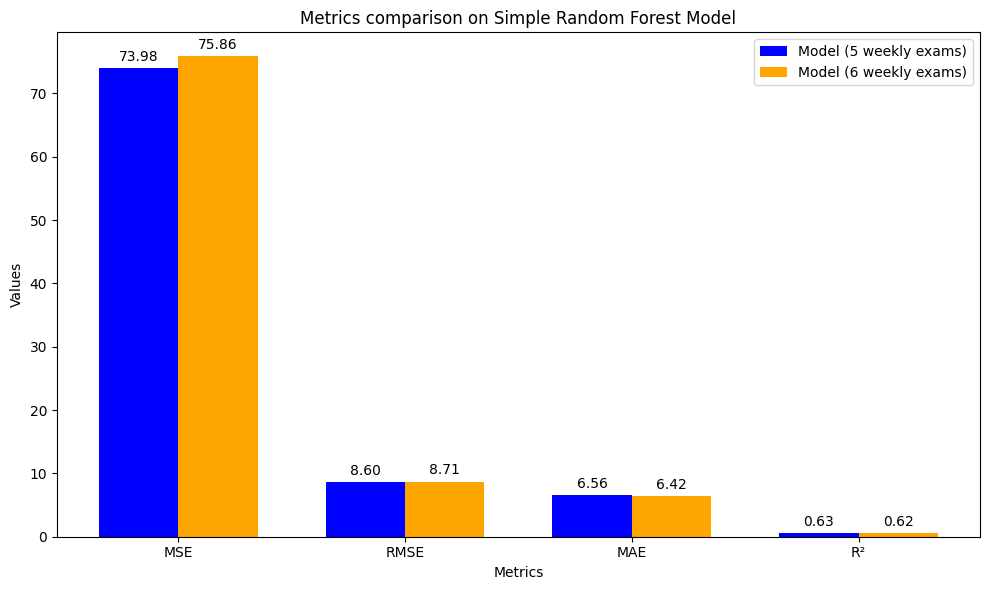

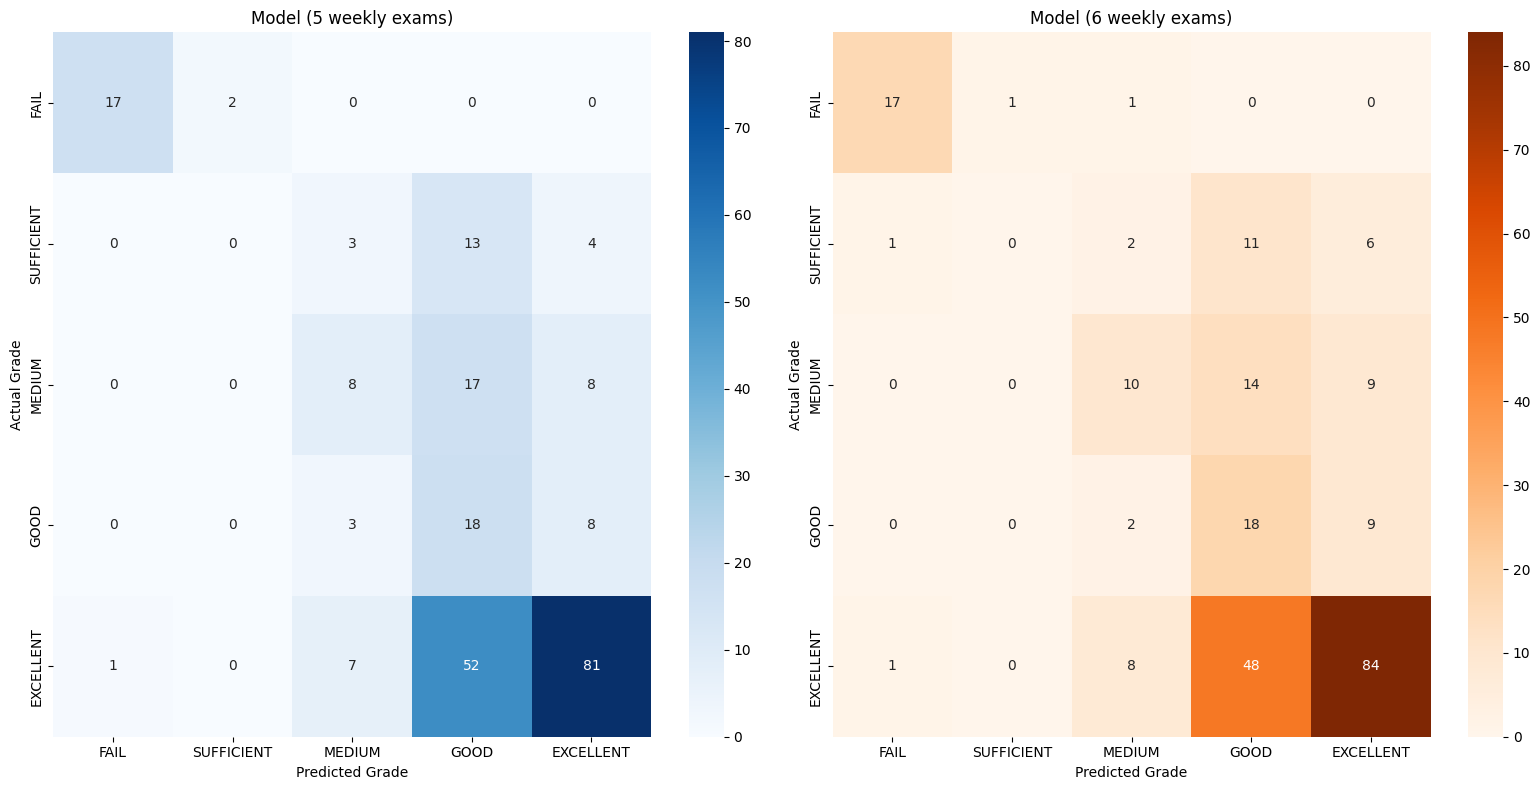

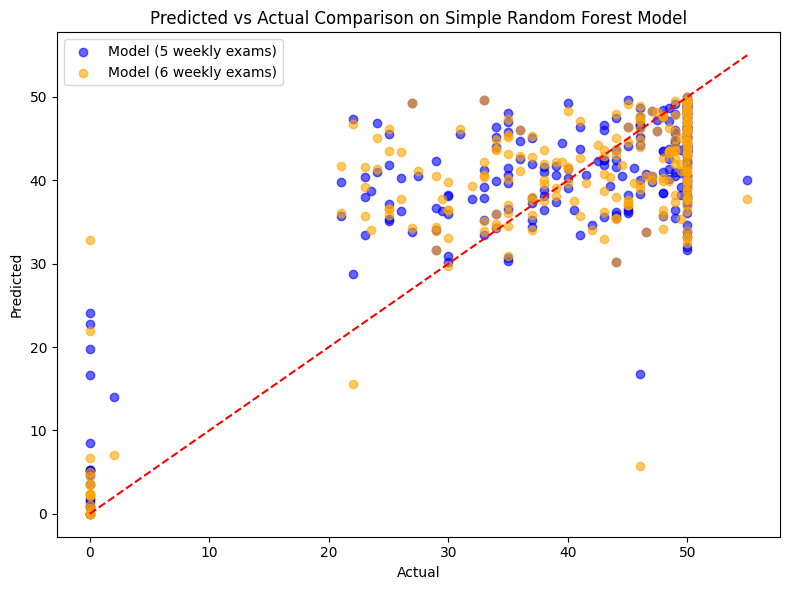

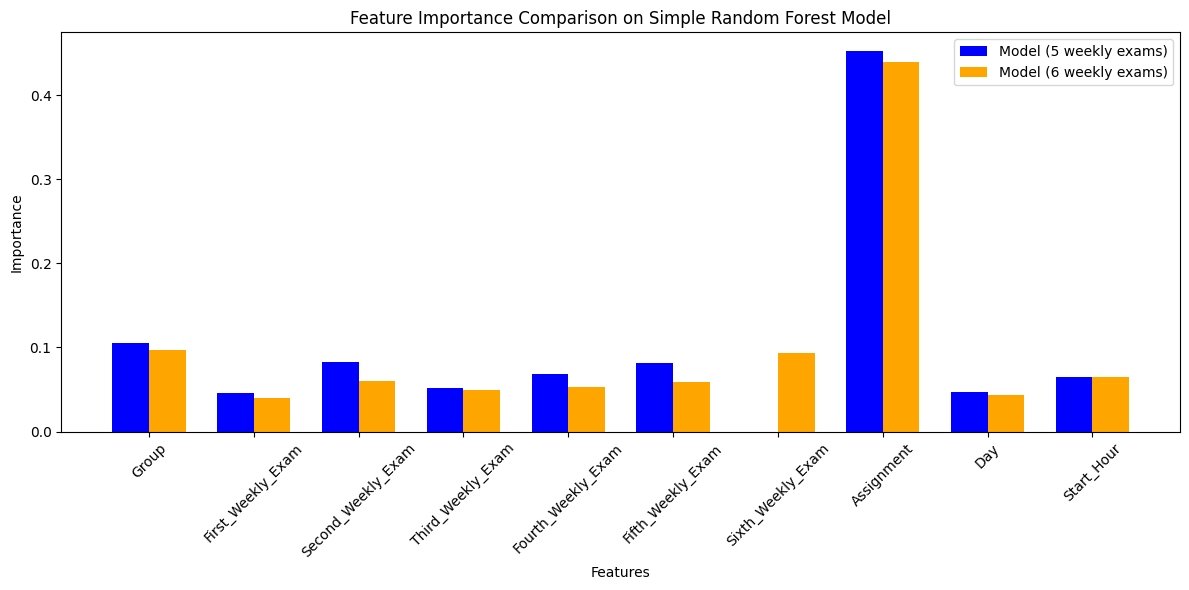

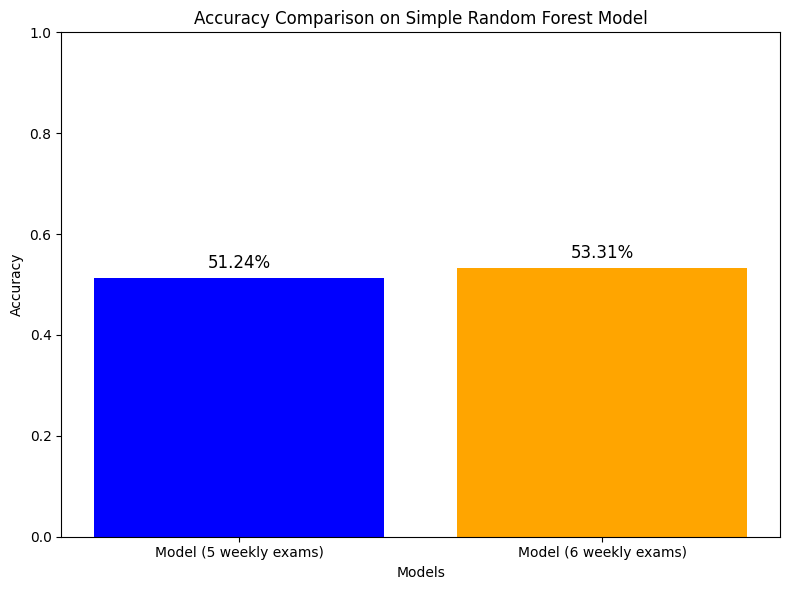

In [12]:
# Metrics calculation
metrics_five = calculate_metrics(YFive_test, y_pred_rf_five)
metrics_six = calculate_metrics(YSix_test, y_pred_rf_six)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
rf_five_values = [metrics_five["MSE"], metrics_five["RMSE"], metrics_five["MAE"], metrics_five["R2"]]
rf_six_values = [metrics_six["MSE"], metrics_six["RMSE"], metrics_six["MAE"], metrics_six["R2"]]

# Plots
generate_metrics_comparison(rf_five_values, rf_six_values,"Metrics comparison on Simple Random Forest Model")
generate_confusion_matrices(y_pred_rf_five, y_pred_rf_six)
generate_predicted_vs_actual_comparison(YFive_test, y_pred_rf_five, YSix_test, y_pred_rf_six, "Predicted vs Actual Comparison on Simple Random Forest Model")
generate_feature_importance_comparison(rf_five_model, rf_six_model, XFive, XSix, "Feature Importance Comparison on Simple Random Forest Model")
generate_accuracy_comparison(metrics_five["Accuracy"], metrics_six["Accuracy"], "Accuracy Comparison on Simple Random Forest Model")

**Weighted Random Forest**


In [11]:
XFive = XFive.fillna(XFive.mean())
sample_weights_five = np.ones(XFive.shape[0])

XSix = XSix.fillna(XSix.mean())
sample_weights_six = np.ones(XSix.shape[0])

assignment_weight = 50
assignment_index_five = XFive.columns.get_loc('Assignment')
assignment_index_six = XSix.columns.get_loc('Assignment')

remaining_weight = 50
num_other_features_five = XFive.shape[1] - 1
num_other_features_six = XSix.shape[1] - 1

equal_weight_five = remaining_weight / num_other_features_five
equal_weight_six = remaining_weight / num_other_features_six

# Weights for each feature (applied to samples)
weights_per_feature_five = np.ones(XFive.shape[1]) * equal_weight_five
weights_per_feature_five[assignment_index_five] = assignment_weight

weights_per_feature_six = np.ones(XSix.shape[1]) * equal_weight_six
weights_per_feature_six[assignment_index_six] = assignment_weight

# Apply the weight for each feature to all the samples
for idx, col in enumerate(XFive.columns):
    sample_weights_five *= np.where(XFive[col] == XFive[col], weights_per_feature_five[idx], 1)

# Apply the weight for each feature to all the samples
for idx, col in enumerate(XSix.columns):
    sample_weights_six *= np.where(XSix[col] == XSix[col], weights_per_feature_six[idx], 1)

rf_model_five_weighted = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_five_weighted.fit(XFive_train, YFive_train, sample_weight=sample_weights_five[:1104])

rf_model_six_weighted = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_six_weighted.fit(XSix_train, YSix_train, sample_weight=sample_weights_six[:1104])

YFive_pred_weighted = rf_model_five_weighted.predict(XFive_test)
YSix_pred_weighted = rf_model_six_weighted.predict(XSix_test)

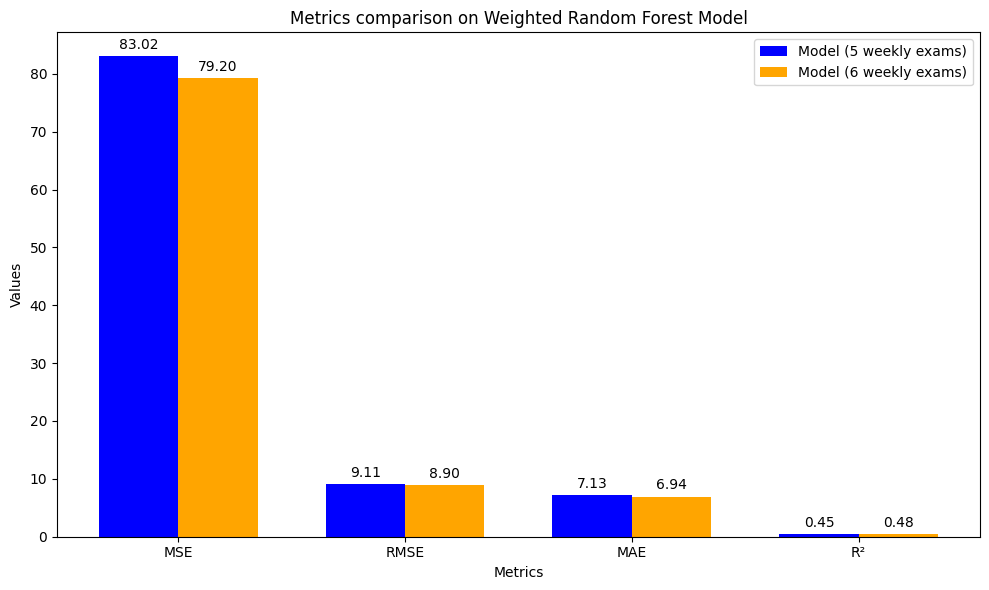

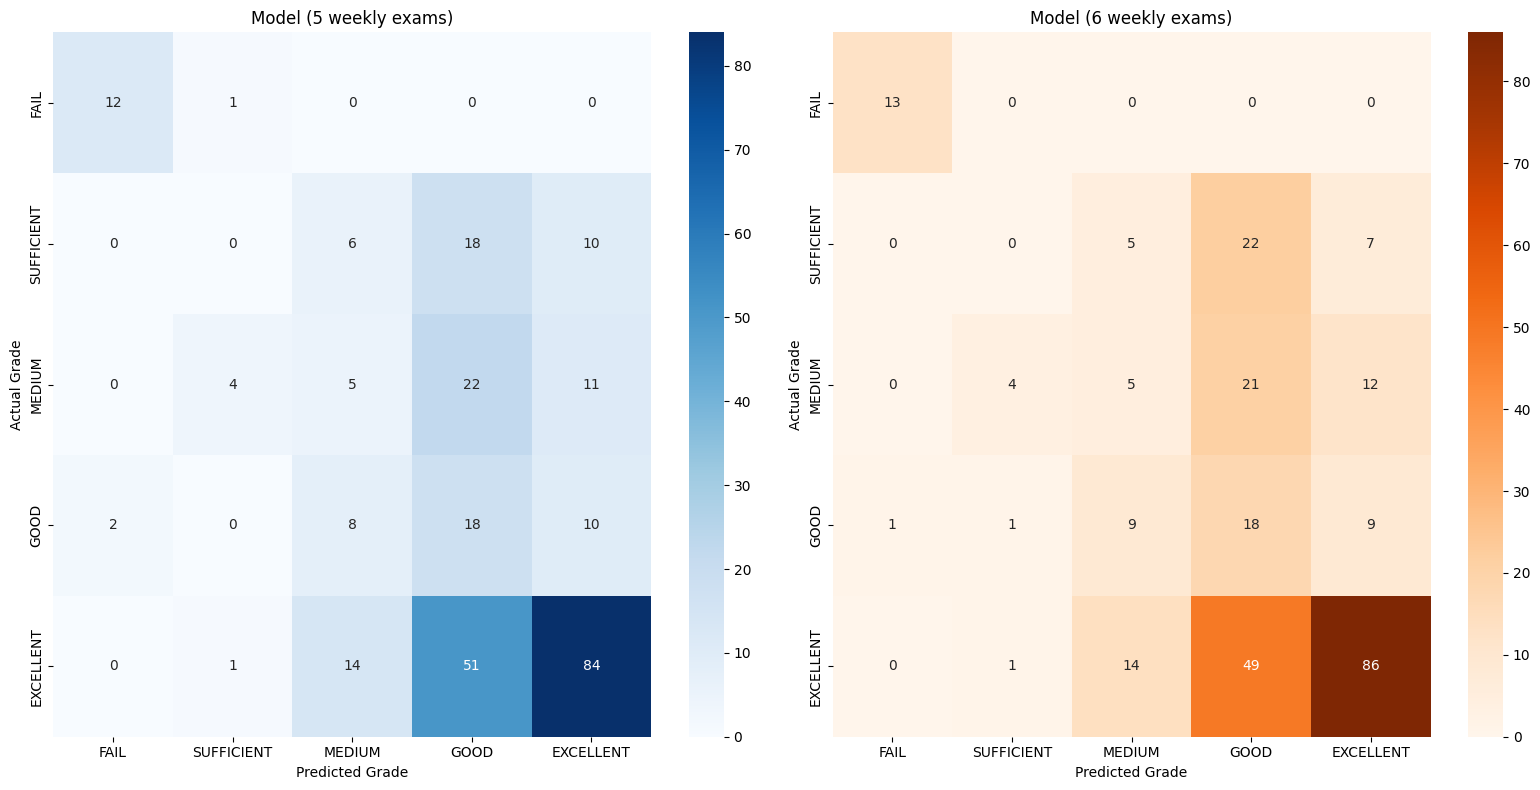

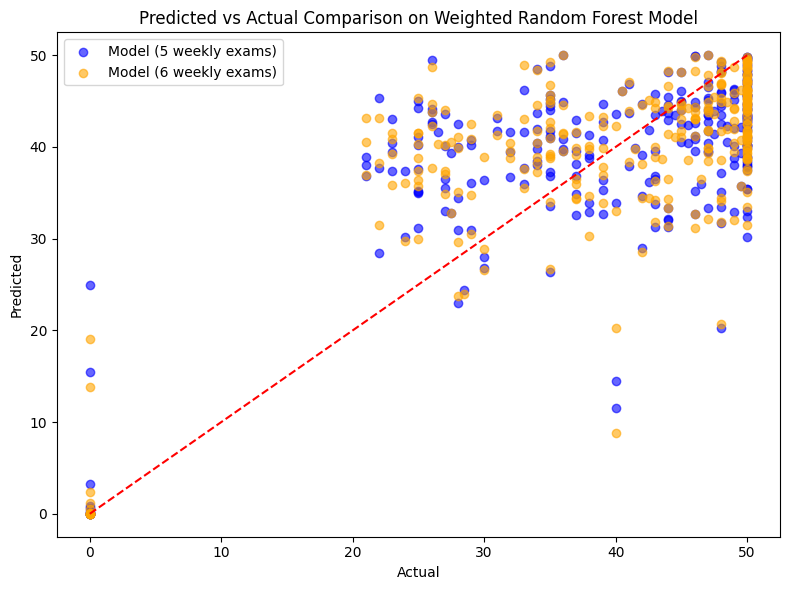

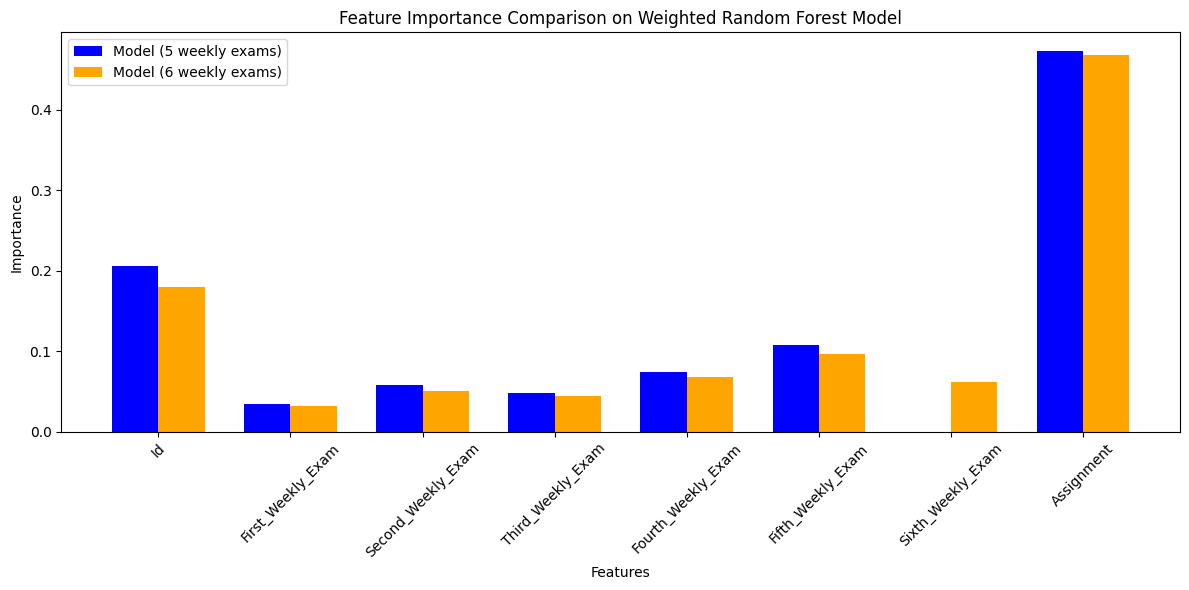

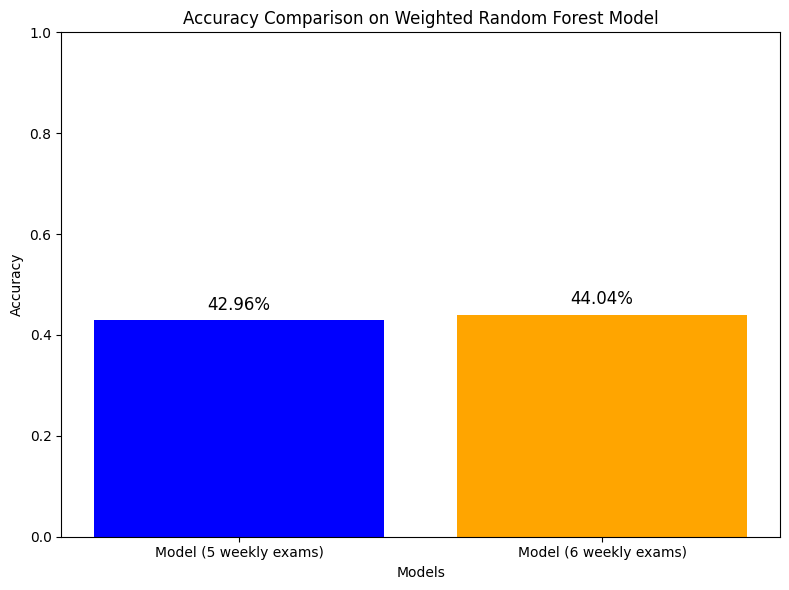

In [12]:
# Metrics calculation
metrics_five_weighted = calculate_metrics(YFive_test, YFive_pred_weighted)
metrics_six_weighted = calculate_metrics(YSix_test, YSix_pred_weighted)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
rf_weighted_five_values = [metrics_five_weighted["MSE"], metrics_five_weighted["RMSE"], metrics_five_weighted["MAE"], metrics_five_weighted["R2"]]
rf_weighted_six_values = [metrics_six_weighted["MSE"], metrics_six_weighted["RMSE"], metrics_six_weighted["MAE"], metrics_six_weighted["R2"]]

# Plots
generate_metrics_comparison(rf_weighted_five_values, rf_weighted_six_values,"Metrics comparison on Weighted Random Forest Model")
generate_confusion_matrices(YFive_pred_weighted, YSix_pred_weighted)
generate_predicted_vs_actual_comparison(YFive_test, YFive_pred_weighted, YSix_test, YSix_pred_weighted, "Predicted vs Actual Comparison on Weighted Random Forest Model")
generate_feature_importance_comparison(rf_model_five_weighted, rf_model_six_weighted, XFive, XSix, "Feature Importance Comparison on Weighted Random Forest Model")
generate_accuracy_comparison(metrics_five_weighted["Accuracy"], metrics_six_weighted["Accuracy"], "Accuracy Comparison on Weighted Random Forest Model")

**Random Forest with best parameters**

In [13]:
# Optimized Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf_five = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf_five.fit(XFive_train, YFive_train)

best_rf_model_five = grid_search_rf_five.best_estimator_

grid_search_rf_six = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf_six.fit(XSix_train, YSix_train)

best_rf_model_six = grid_search_rf_six.best_estimator_

YFive_pred_best_rf = best_rf_model_five.predict(XFive_test)
YSix_pred_best_rf = best_rf_model_six.predict(XSix_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


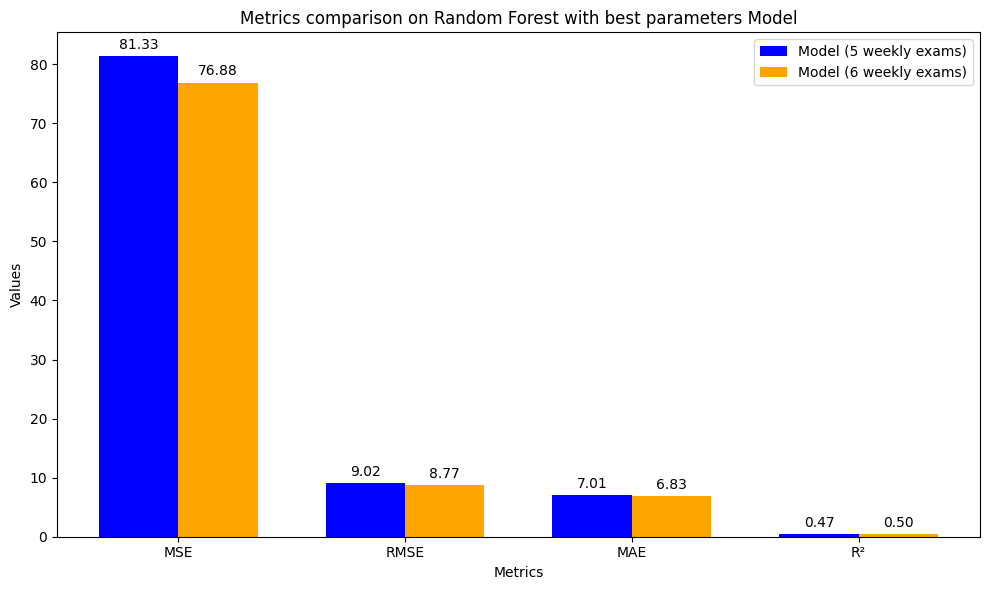

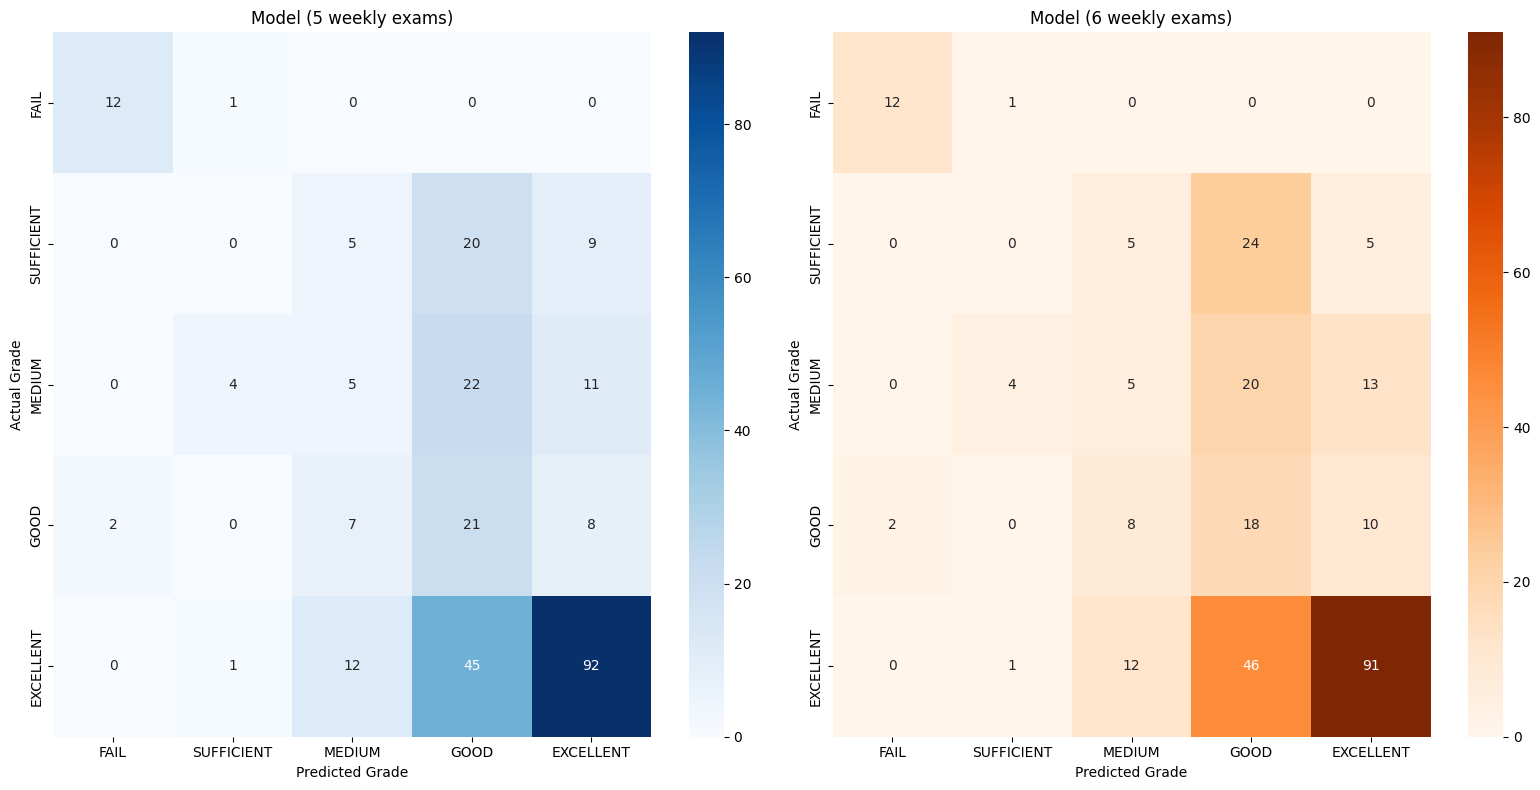

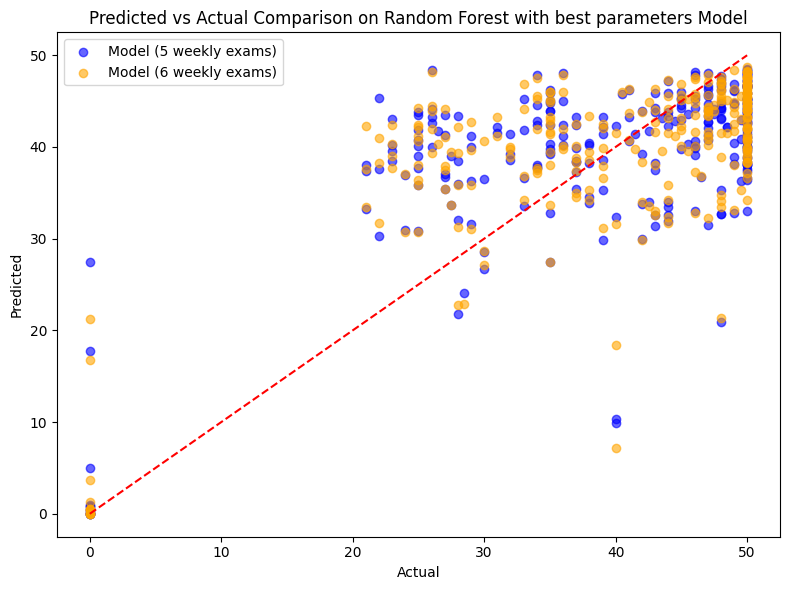

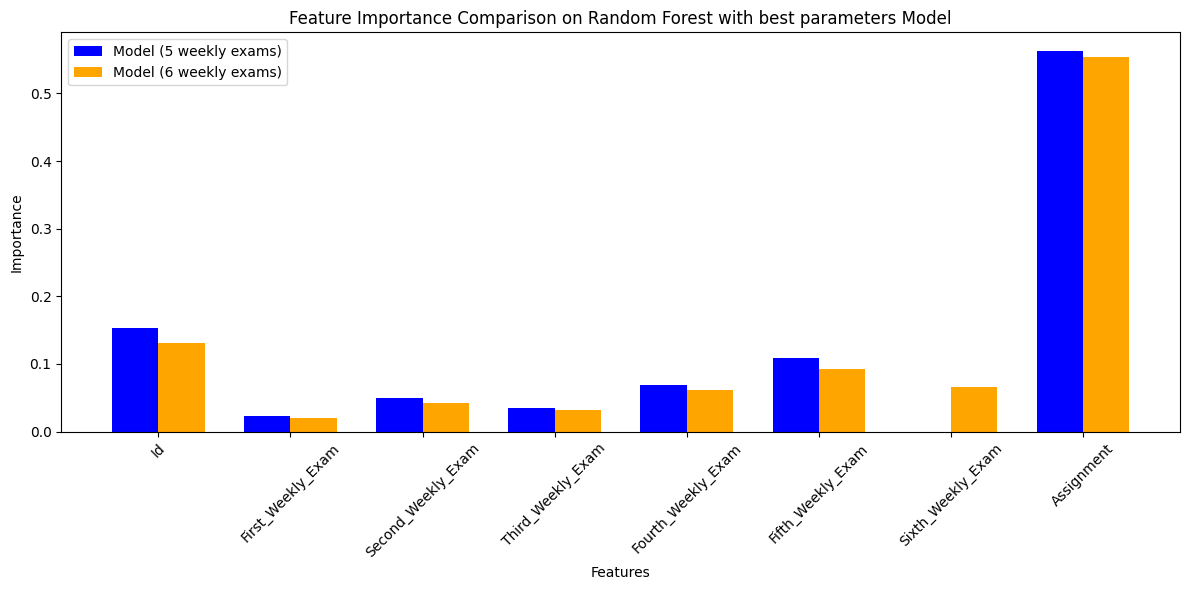

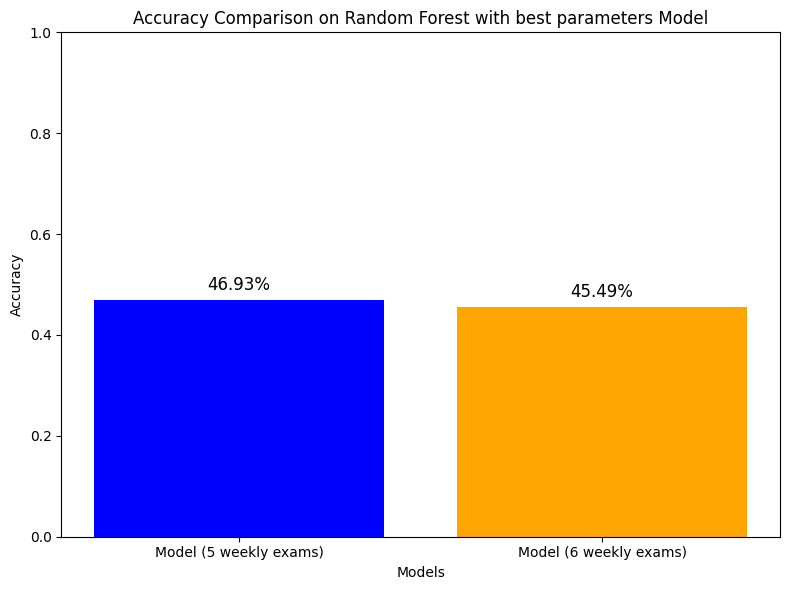

In [14]:
# Metrics calculation
metrics_five_best = calculate_metrics(YFive_test, YFive_pred_best_rf)
metrics_six_best = calculate_metrics(YSix_test, YSix_pred_best_rf)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
rf_best_five_values = [metrics_five_best["MSE"], metrics_five_best["RMSE"], metrics_five_best["MAE"], metrics_five_best["R2"]]
rf_best_six_values = [metrics_six_best["MSE"], metrics_six_best["RMSE"], metrics_six_best["MAE"], metrics_six_best["R2"]]

# Plots
generate_metrics_comparison(rf_best_five_values, rf_best_six_values,"Metrics comparison on Random Forest with best parameters Model")
generate_confusion_matrices(YFive_pred_best_rf, YSix_pred_best_rf)
generate_predicted_vs_actual_comparison(YFive_test, YFive_pred_best_rf, YSix_test, YSix_pred_best_rf, "Predicted vs Actual Comparison on Random Forest with best parameters Model")
generate_feature_importance_comparison(best_rf_model_five, best_rf_model_six, XFive, XSix, "Feature Importance Comparison on Random Forest with best parameters Model")
generate_accuracy_comparison(metrics_five_best["Accuracy"], metrics_six_best["Accuracy"], "Accuracy Comparison on Random Forest with best parameters Model")

**Bagging Random Forest**

In [15]:
bagging_rf_five = BaggingRegressor(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    n_estimators=10,
    random_state=42
)
bagging_rf_five.fit(XFive_train, YFive_train)

YFive_pred_bagged_rf = bagging_rf_five.predict(XFive_test)

bagging_rf_six = BaggingRegressor(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    n_estimators=10,
    random_state=42
)
bagging_rf_six.fit(XSix_train, YSix_train)

YSix_pred_bagged_rf = bagging_rf_six.predict(XSix_test)

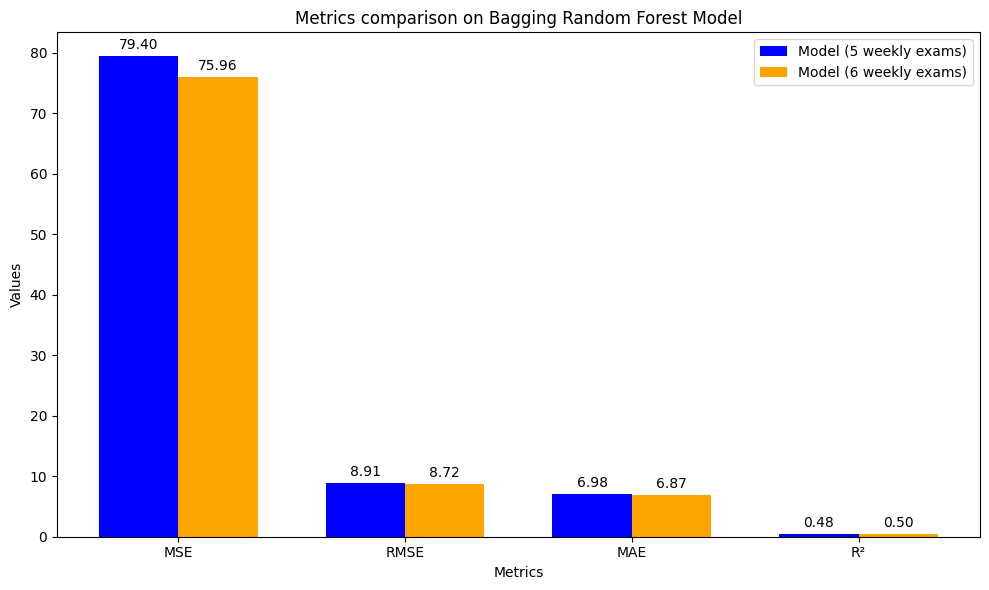

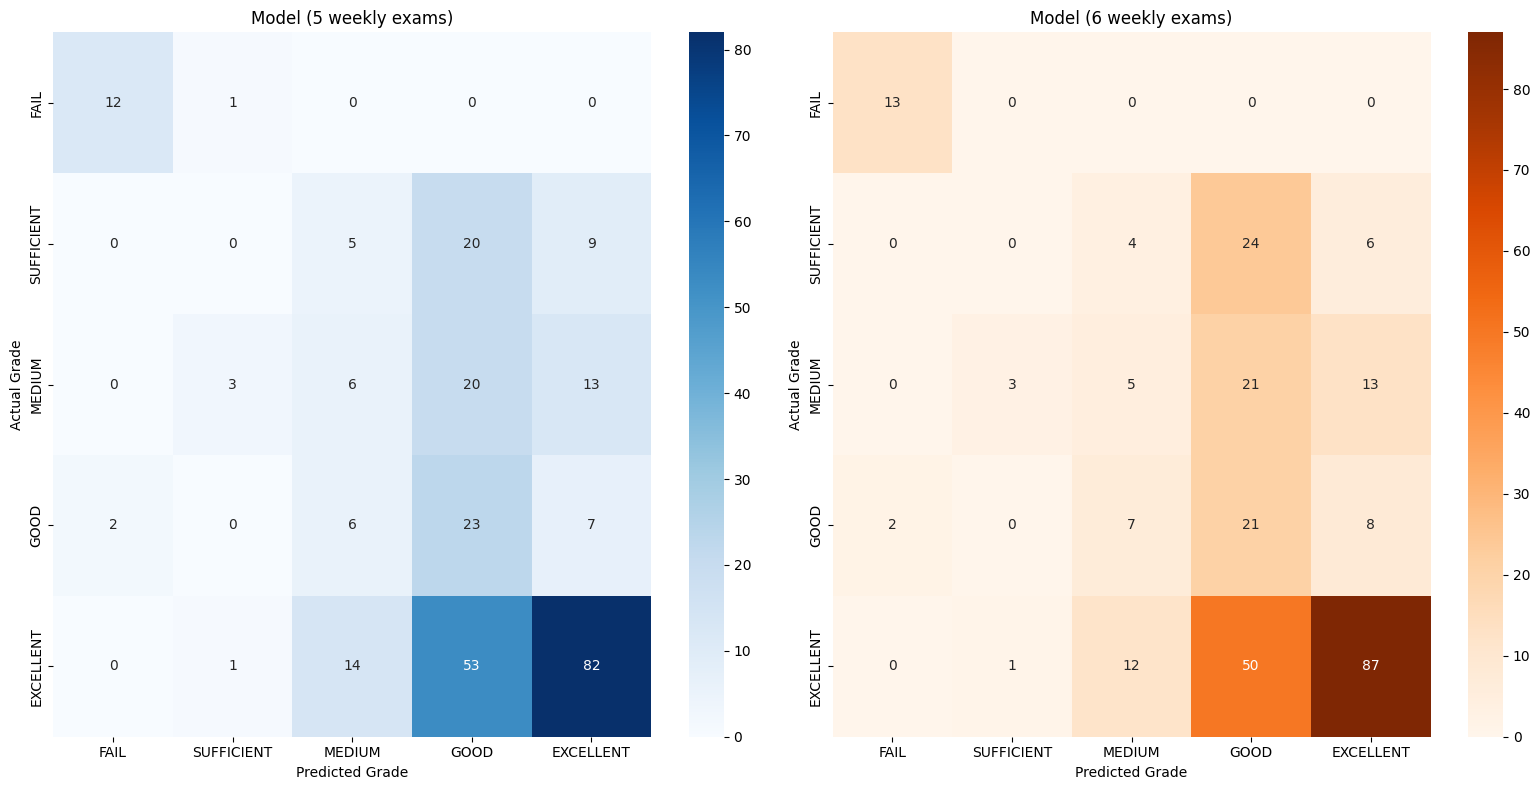

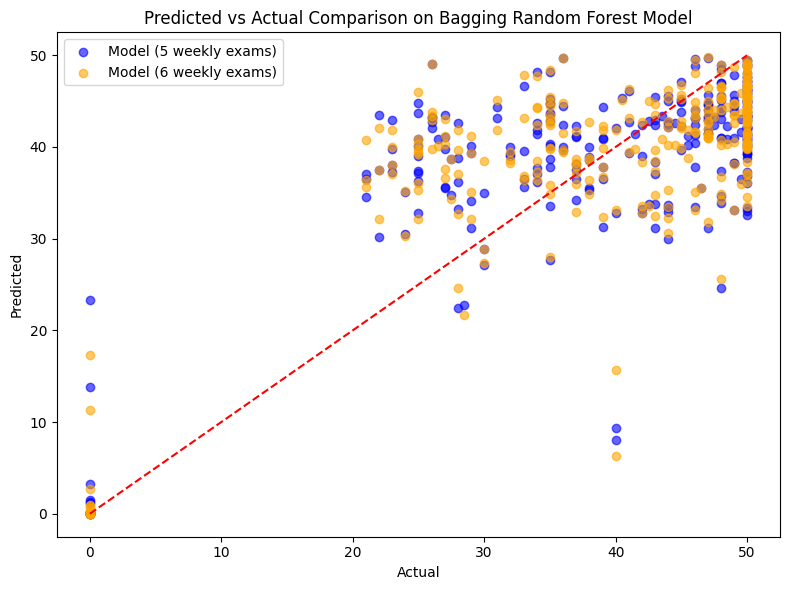

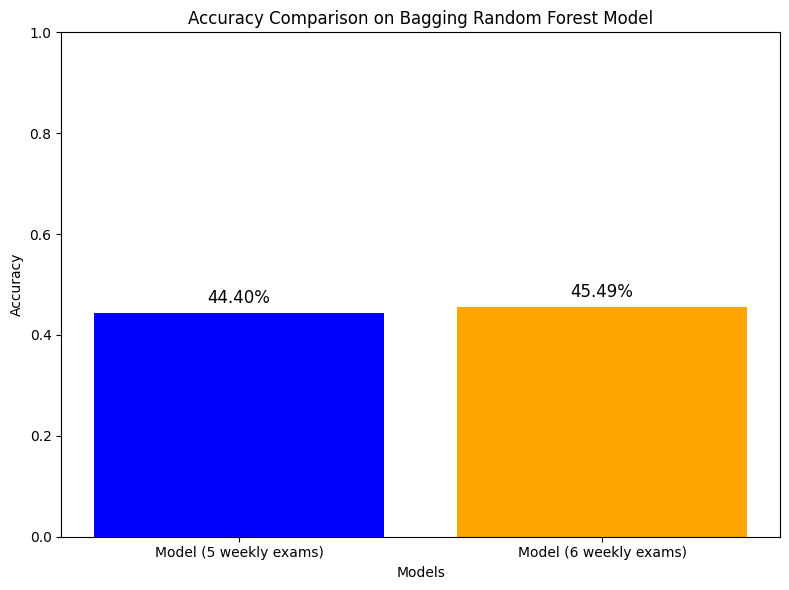

In [16]:
# Metrics calculation
metrics_five_bagging = calculate_metrics(YFive_test, YFive_pred_bagged_rf)
metrics_six_bagging = calculate_metrics(YSix_test, YSix_pred_bagged_rf)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
rf_bagging_five_values = [metrics_five_bagging["MSE"], metrics_five_bagging["RMSE"], metrics_five_bagging["MAE"], metrics_five_bagging["R2"]]
rf_bagging_six_values = [metrics_six_bagging["MSE"], metrics_six_bagging["RMSE"], metrics_six_bagging["MAE"], metrics_six_bagging["R2"]]

# Plots
generate_metrics_comparison(rf_bagging_five_values, rf_bagging_six_values,"Metrics comparison on Bagging Random Forest Model")
generate_confusion_matrices(YFive_pred_bagged_rf, YSix_pred_bagged_rf)
generate_predicted_vs_actual_comparison(YFive_test, YFive_pred_bagged_rf, YSix_test, YSix_pred_bagged_rf, "Predicted vs Actual Comparison on Bagging Random Forest Model")
generate_accuracy_comparison(metrics_five_bagging["Accuracy"], metrics_six_bagging["Accuracy"], "Accuracy Comparison on Bagging Random Forest Model")

**Stacked Model**

In [17]:
ada_model_five = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model_five.fit(XFive_train, YFive_train)

ada_model_six = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model_six.fit(XSix_train, YSix_train)

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(XFive_train, YFive_train)
optimized_gb_five = grid_search_gb.best_estimator_
optimized_gb_six = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

base_models_five = [
    ('rf', best_rf_model_five),
    ('ada', ada_model_five),
    ('gb', optimized_gb_five)
]

stacked_model_five = StackingRegressor(
    estimators=base_models_five,
    final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42),
    passthrough=True
)
stacked_model_five.fit(XFive_train, YFive_train)
y_pred_stacked_five = stacked_model_five.predict(XFive_test)

base_models_six = [
    ('rf', best_rf_model_six),
    ('ada', ada_model_six),
    ('gb', optimized_gb_six)
]

stacked_model_six = StackingRegressor(
    estimators=base_models_six,
    final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42),
    passthrough=True  # Include base predictions in meta-model features
)
stacked_model_six.fit(XSix_train, YSix_train)
y_pred_stacked_six = stacked_model_six.predict(XSix_test)

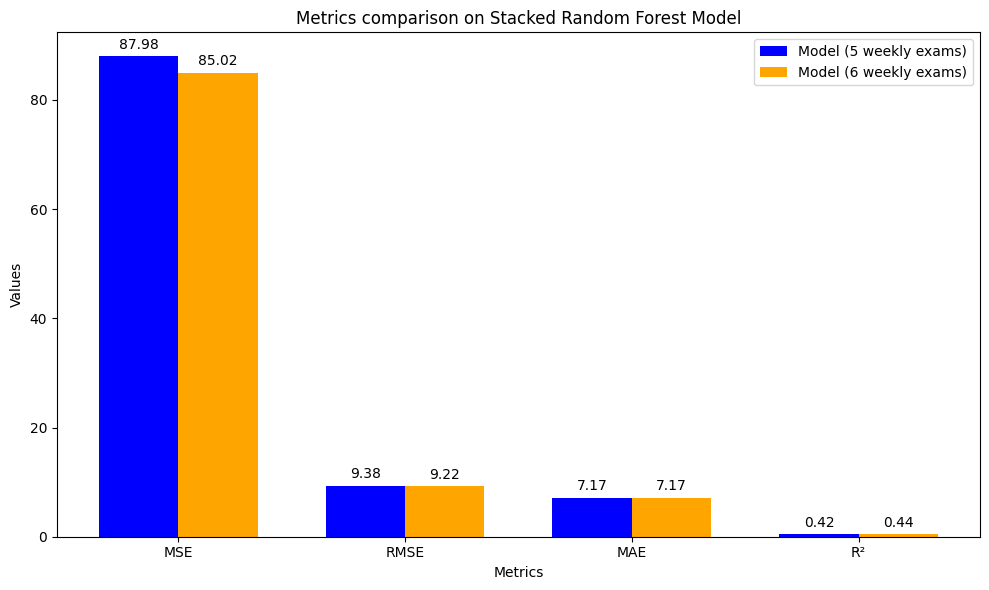

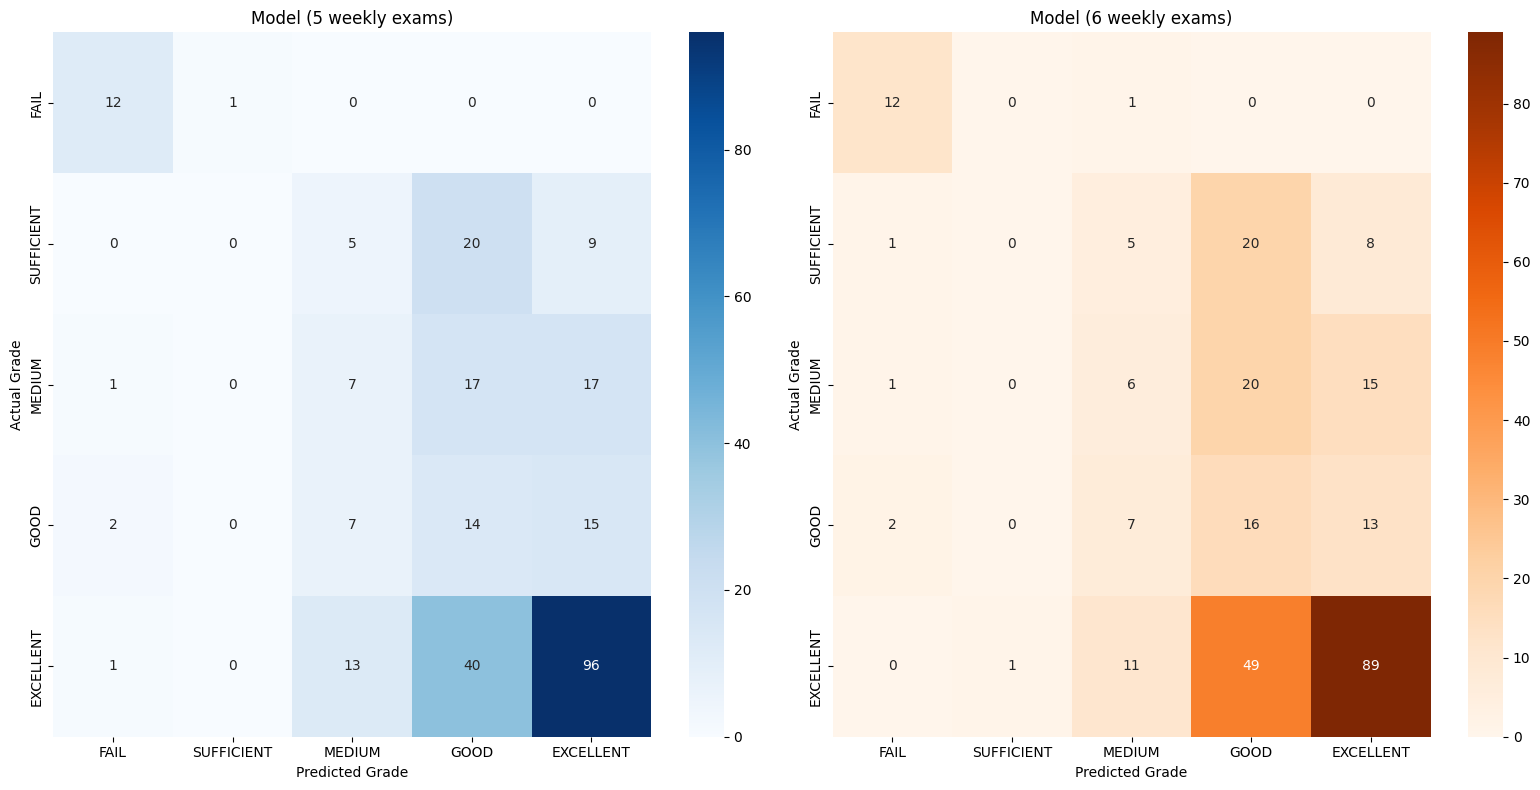

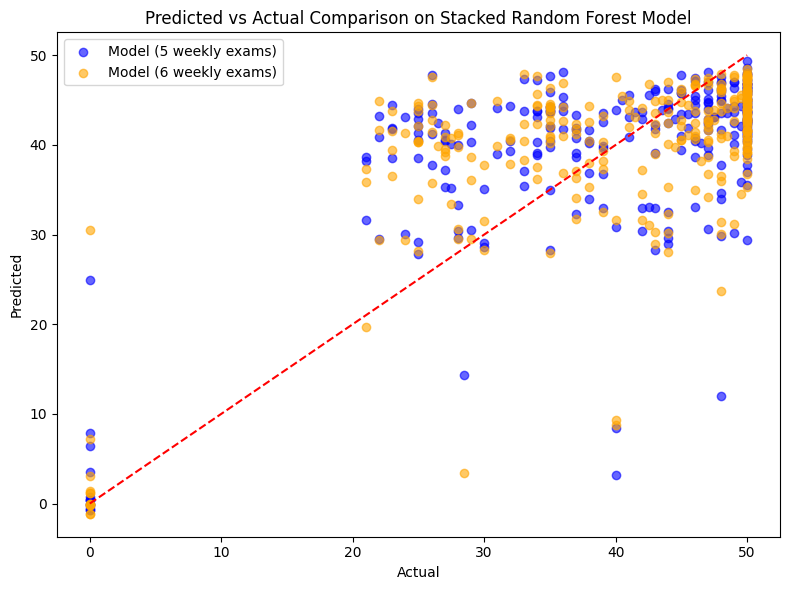

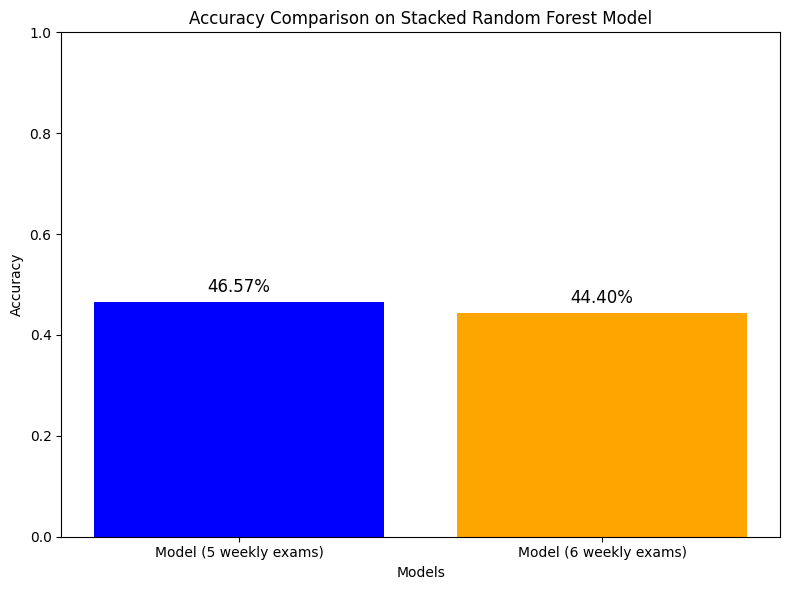

In [18]:
# Metrics calculation
metrics_five_stacked = calculate_metrics(YFive_test, y_pred_stacked_five)
metrics_six_stacked = calculate_metrics(YSix_test, y_pred_stacked_six)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
rf_stacked_five_values = [metrics_five_stacked["MSE"], metrics_five_stacked["RMSE"], metrics_five_stacked["MAE"], metrics_five_stacked["R2"]]
rf_stacked_six_values = [metrics_six_stacked["MSE"], metrics_six_stacked["RMSE"], metrics_six_stacked["MAE"], metrics_six_stacked["R2"]]

# Plots
generate_metrics_comparison(rf_stacked_five_values, rf_stacked_six_values,"Metrics comparison on Stacked Random Forest Model")
generate_confusion_matrices(y_pred_stacked_five, y_pred_stacked_six)
generate_predicted_vs_actual_comparison(YFive_test, y_pred_stacked_five, YSix_test, y_pred_stacked_six, "Predicted vs Actual Comparison on Stacked Random Forest Model")
generate_accuracy_comparison(metrics_five_stacked["Accuracy"], metrics_six_stacked["Accuracy"], "Accuracy Comparison on Stacked Random Forest Model")

**Comparison**

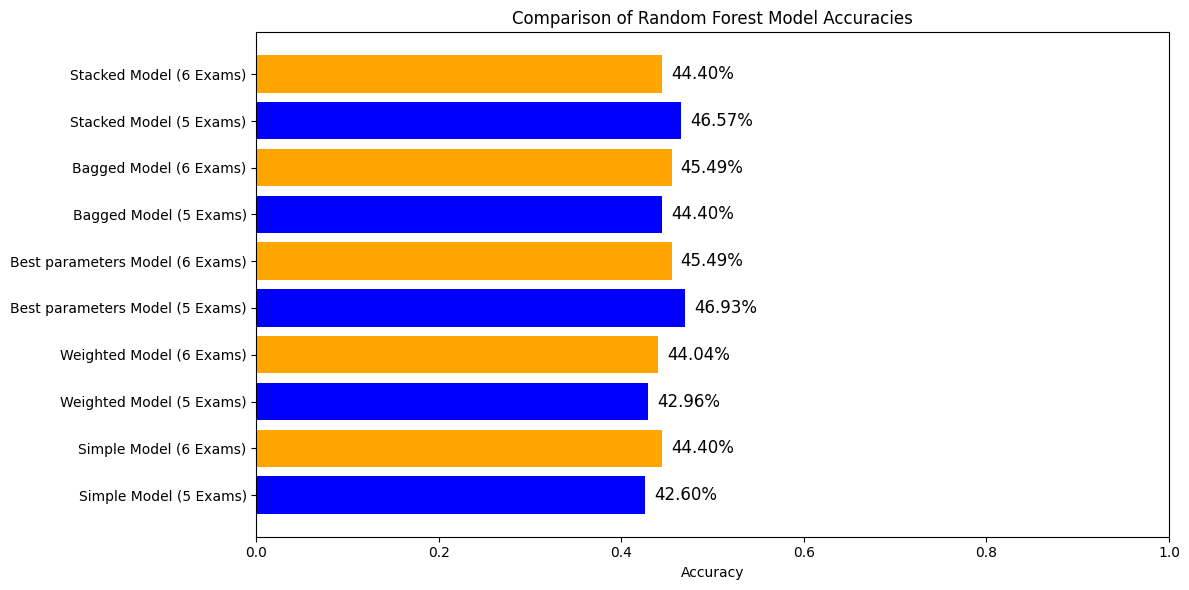

In [19]:
models = [
    "Simple Model (5 Exams)", "Simple Model (6 Exams)",
    "Weighted Model (5 Exams)", "Weighted Model (6 Exams)",
    "Best parameters Model (5 Exams)", "Best parameters Model (6 Exams)",
    "Bagged Model (5 Exams)", "Bagged Model (6 Exams)",
    "Stacked Model (5 Exams)", "Stacked Model (6 Exams)"
]

accuracies = [
    metrics_five["Accuracy"], metrics_six["Accuracy"],
    metrics_five_weighted["Accuracy"], metrics_six_weighted["Accuracy"],
    metrics_five_best["Accuracy"], metrics_six_best["Accuracy"],
    metrics_five_bagging["Accuracy"], metrics_six_bagging["Accuracy"],
    metrics_five_stacked["Accuracy"], metrics_six_stacked["Accuracy"]
]

plt.figure(figsize=(12, 6))
plt.barh(models, accuracies, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.xlabel('Accuracy')
plt.title('Comparison of Random Forest Model Accuracies')
plt.xlim(0, 1)

for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()